In [2]:
pip install Scikit-Fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Scikit-Fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=2c98190daebc8acc5bf2c7bc470588bf611475afcacc4f4748e5fd21ffea583a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built Scikit-Fuzzy


<ipython-input-14-75cb274a0b07>:52: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-14-75cb274a0b07>:53: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-14-75cb274a0b07>:54: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


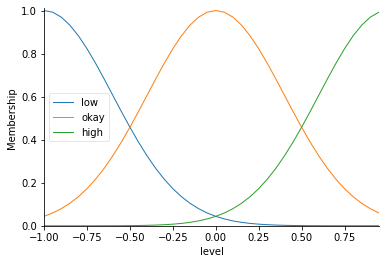

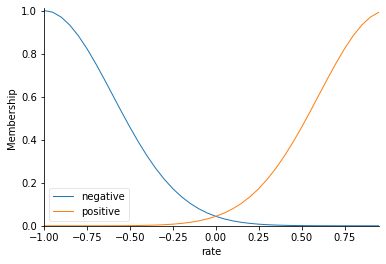

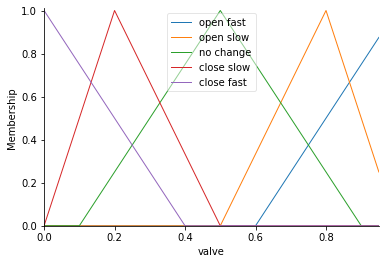

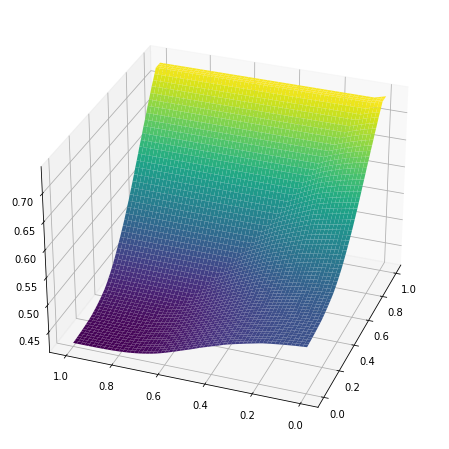

In [14]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

level = ctrl.Antecedent(np.arange(-1,1,0.05),'level')    
rate = ctrl.Antecedent(np.arange(-1,1,0.05),'rate')
valve = ctrl.Consequent(np.arange(0,1,0.05),'valve')

level['low']  = fuzz.gaussmf(level.universe,-1,0.4)
level['okay'] = fuzz.gaussmf(level.universe,0,0.4)
level['high'] = fuzz.gaussmf(level.universe,1,0.4)

rate['negative'] = fuzz.gaussmf(rate.universe,-1,0.4)
rate['positive'] = fuzz.gaussmf(rate.universe,1,0.4)


valve['open fast'] = fuzz.trimf(valve.universe,[0.6,1,1])   
valve['open slow'] = fuzz.trimf(valve.universe,[0.5,0.8,1])         
valve['no change'] = fuzz.trimf(valve.universe,[0.1,0.5,0.9])            
valve['close slow'] = fuzz.trimf(valve.universe,[0,0.2,0.5])         
valve['close fast'] = fuzz.trimf(valve.universe,[0,0,0.4])   

level.view()
rate.view()
valve.view()


rule1 = ctrl.Rule(antecedent=(level['low']),consequent=valve['open fast'],label='open fast')
rule2 = ctrl.Rule(antecedent=(level['okay']),consequent=valve['no change'],label='no change')
rule3 = ctrl.Rule(antecedent=(level['high']),consequent=valve['open fast'],label='close fast')
rule4 = ctrl.Rule(antecedent=((level['okay']&rate['negative'])),consequent=valve['open slow'],label='open slow')
rule5 = ctrl.Rule(antecedent=((level['okay']&rate['positive'])),consequent=valve['close slow'],label='close slow')

system = ctrl.ControlSystem(rules =[ rule1, rule2, rule3, rule4,rule5])
sim = ctrl.ControlSystemSimulation(system,flush_after_run = 40*40+1)
unsampled = np.linspace(0,1,61)
x,y = np.meshgrid(unsampled,unsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61): 
    sim.input['level'] = x[i,j]
    sim.input['rate'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['valve']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)